In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
df=pd.read_csv('play_tennis_id3.csv')
df.head(),df.shape


(    Outlook Temperature Humidity    Wind PlayTennis
 0     sunny         hot     high    weak         no
 1     sunny         hot     high  strong         no
 2  overcast         hot     high    weak        yes
 3      rain        mild     high    weak        yes
 4      rain        cool   normal    weak        yes,
 (14, 5))

In [3]:
df_feature=pd.get_dummies(df[['Outlook','Temperature','Humidity','Wind']])
df_feature.head()
ohe=OneHotEncoder()
target=ohe.fit_transform(df[['PlayTennis']])
target.toarray()
df_target=pd.DataFrame(target.toarray(),columns=ohe.categories_[0])
df_target.head()
df_target.drop(columns='no',inplace=True)
df_target.head()

,yes
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0


In [4]:
x_train,x_test,y_train,y_test=train_test_split(df_feature,df_target,test_size=0.2,random_state=17)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((11, 10), (3, 10), (11, 1), (3, 1))

In [5]:
model=DecisionTreeClassifier(criterion='entropy',random_state=17)
model.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,17
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [6]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy:',accuracy)

Accuracy: 1.0


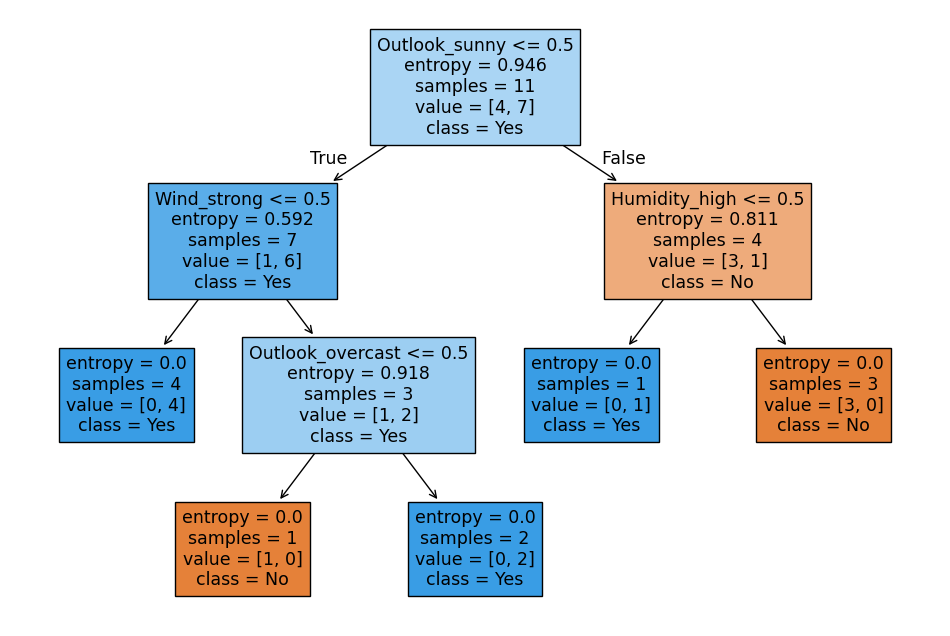

In [7]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(12,8))
plot_tree(model,feature_names=df_feature.columns,class_names=['No','Yes'],filled=True)
plt.show()


In [12]:
df1=df.drop(columns='PlayTennis')
# Assume original categorical features before one-hot encoding:
original_features = df1.columns
possible_values = {col: df1[col].unique() for col in original_features}

user_input = {}
for col in original_features:
    val = input(f"Enter value for {col} (options: {possible_values[col]}): ")
    user_input[col] = val
print("User input:", user_input)
# Convert single sample dict to DataFrame
user_df = pd.DataFrame([user_input])

# One-hot encode using the same columns as training
user_df_encoded = pd.get_dummies(user_df)
user_df_encoded = user_df_encoded.reindex(columns=df_feature.columns, fill_value=0)  # align columns

# Predict
prediction = model.predict(user_df_encoded)
print("Predicted class:", prediction[0])


User input: {'Outlook': 'sunny', 'Temperature': 'mild', 'Humidity': 'normal', 'Wind': 'weak'}
Predicted class: 1.0
